In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('Done')

Done


In [44]:
# import csv file

df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')

In [3]:
df.shape

(11251, 15)

In [42]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [45]:
#drop unrelated/blank columns

df.drop(['Status','unnamed1'],axis = 1,inplace = True)

In [46]:
#check for null values

df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [47]:
# drop null values

df.dropna(inplace = True)

In [9]:
df.isnull().sum().sum()

0

In [48]:
# change data type

df['Amount'] = df['Amount'].astype('int')

In [11]:
df['Amount'].dtype

dtype('int32')

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
df.rename(columns = {'Marital_Status':'Shadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [14]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [49]:
# use describe() for specific columns

df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [17]:
df.groupby(['Gender'],as_index = False)['Gender'].count().sort_values(by = 'Gender', ascending = False)

,Gender
0,7832
1,3407


[Text(0, 0, '7832'), Text(0, 0, '3407')]

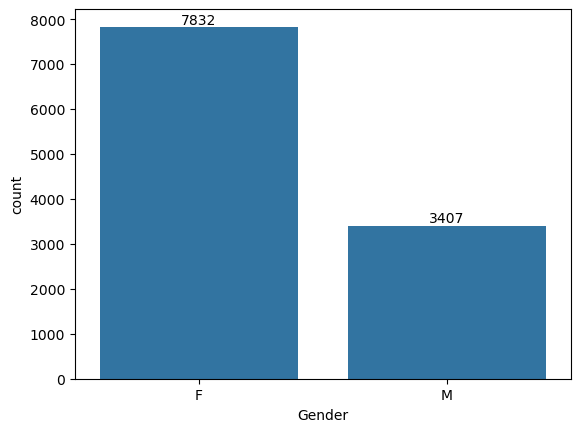

In [50]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x='Gender' , data = df)
ax.bar_label(ax.containers[0])

In [19]:
df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

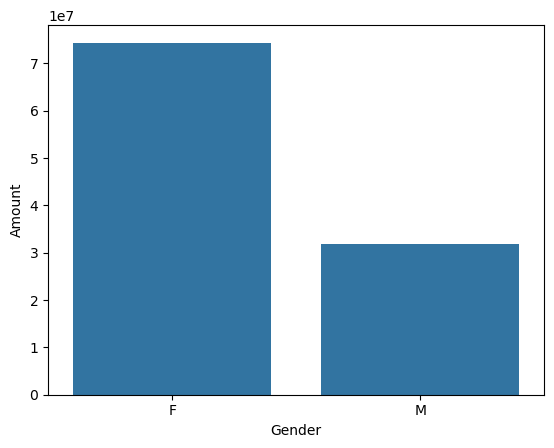

In [51]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

ax = sns.barplot(x = 'Gender' , y = 'Amount' , data = sales_gen)
ax

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

<Axes: xlabel='Age Group', ylabel='count'>

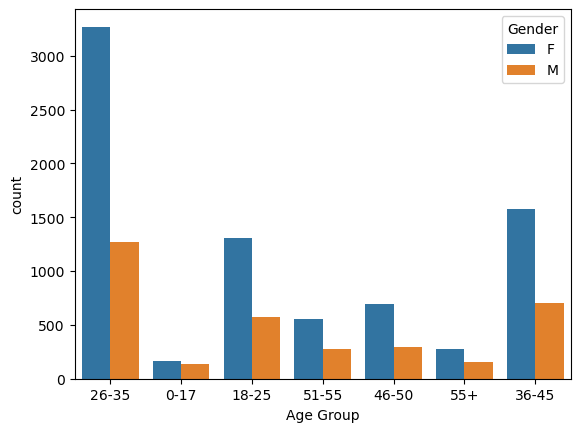

In [21]:
sns.countplot(x = 'Age Group' , data = df , hue = 'Gender')

[Text(0, 0, '3269'),
 Text(0, 0, '162'),
 Text(0, 0, '1305'),
 Text(0, 0, '553'),
 Text(0, 0, '693'),
 Text(0, 0, '272'),
 Text(0, 0, '1578')]

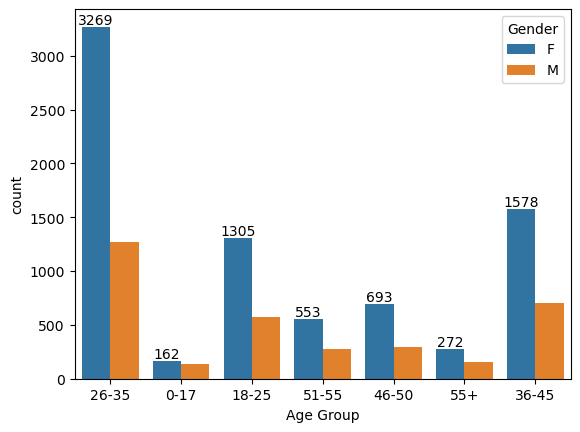

In [22]:
ax = sns.countplot(x = 'Age Group' , data = df , hue = 'Gender')
ax.bar_label(ax.containers[0])

<Axes: xlabel='Age Group', ylabel='Amount'>

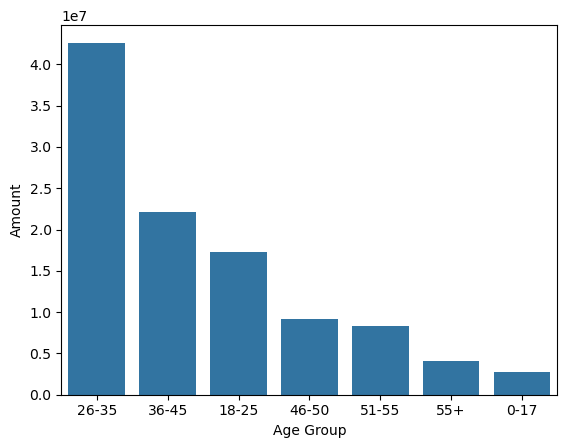

In [52]:
# Total Amount vs Age Group

sales_age = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)

sns.barplot(x = 'Age Group' ,y = 'Amount' ,data = sales_age)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

In [24]:
sales_age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='State', ylabel='Orders'>

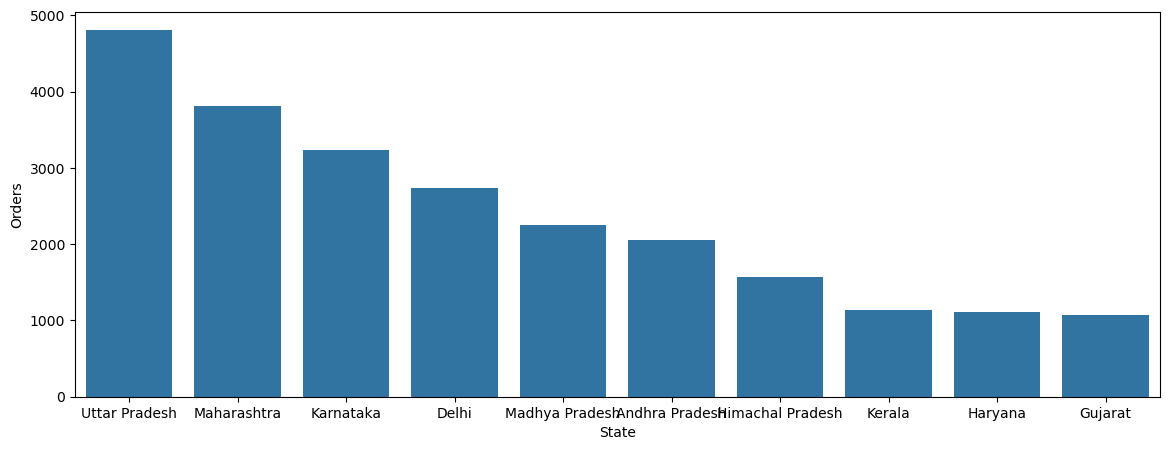

In [53]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'],as_index = False)['Orders'].sum().sort_values(by = 'Orders',ascending = False).head(10)

plt.figure(figsize = (14,5))
sns.barplot(x = 'State' , y = 'Orders' , data = sales_state)

In [26]:
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


<Axes: xlabel='State', ylabel='Amount'>

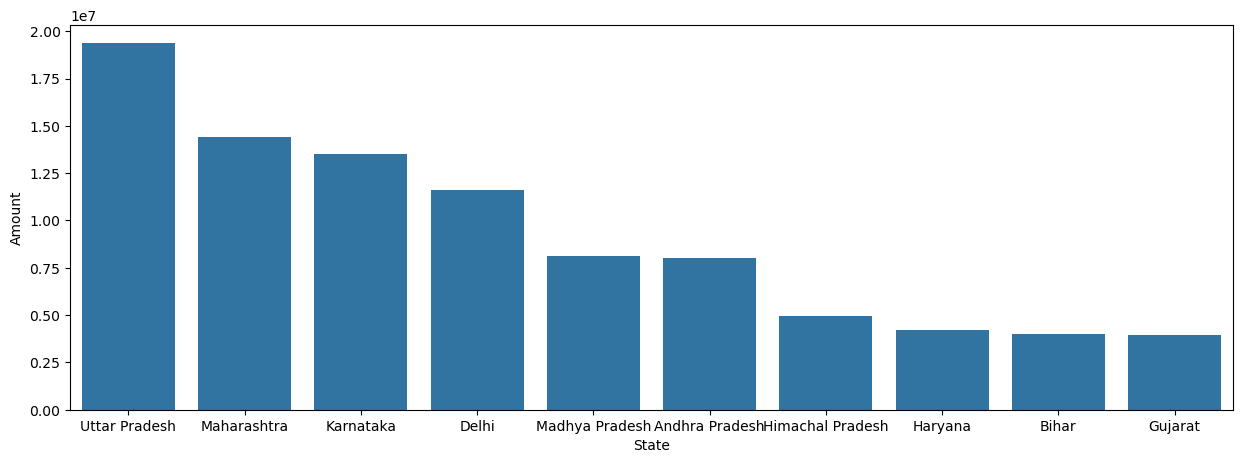

In [27]:
sales_state = df.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(10)

plt.figure(figsize = (15,5))
sns.barplot(x = 'State' , y = 'Amount' , data = sales_state)

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [29]:
sales_state.head()

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142


[Text(0, 0, '6518'), Text(0, 0, '4721')]

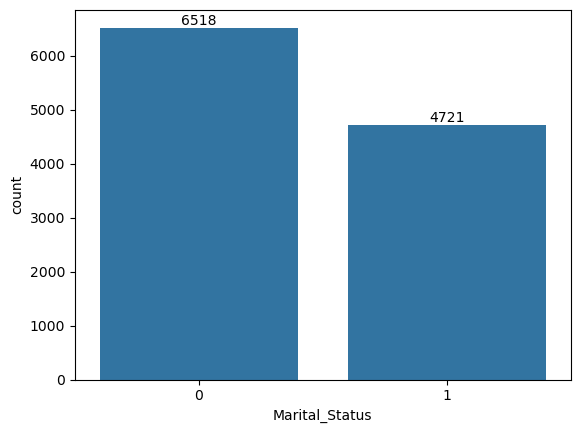

In [30]:
ax = sns.countplot(x = 'Marital_Status' , data = df)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Marital_Status', ylabel='Amount'>

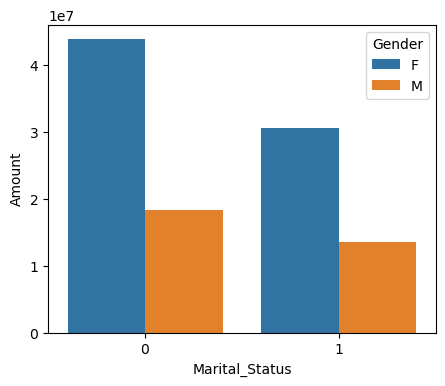

In [31]:
sales_state = df.groupby(['Marital_Status','Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)

plt.figure(figsize = (5,4))
sns.barplot(x = 'Marital_Status', y = 'Amount' , hue = 'Gender' , data = sales_state)

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

In [32]:
sales_state

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


[Text(0, 0, '1408'),
 Text(0, 0, '854'),
 Text(0, 0, '565'),
 Text(0, 0, '414'),
 Text(0, 0, '423'),
 Text(0, 0, '531'),
 Text(0, 0, '637'),
 Text(0, 0, '1137'),
 Text(0, 0, '501'),
 Text(0, 0, '1583'),
 Text(0, 0, '1310'),
 Text(0, 0, '703'),
 Text(0, 0, '283'),
 Text(0, 0, '349'),
 Text(0, 0, '541')]

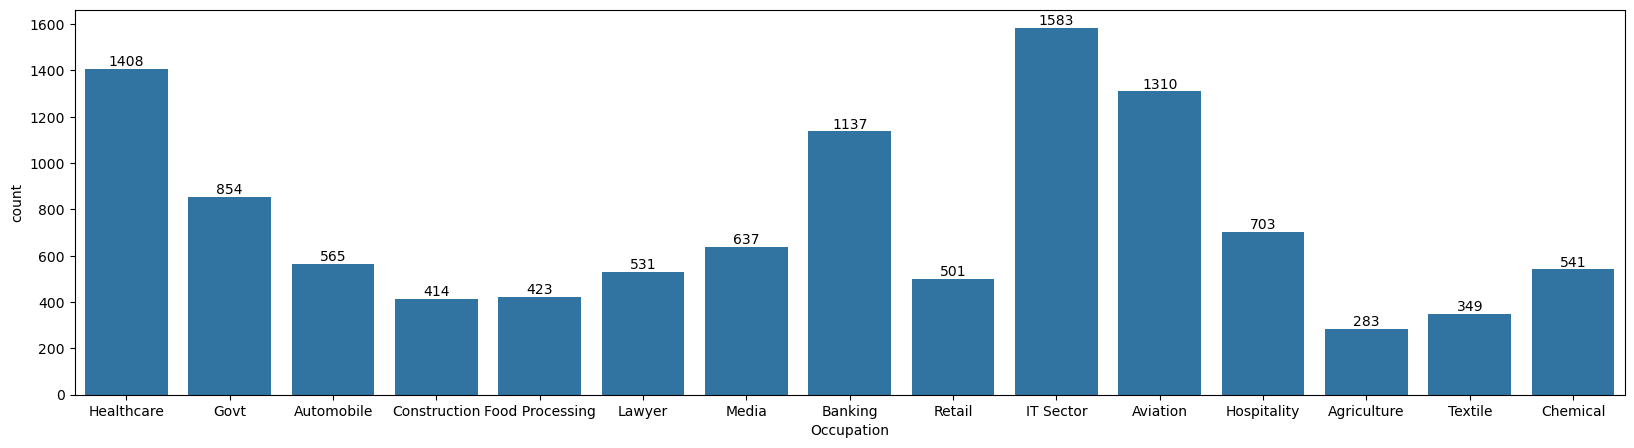

In [33]:
plt.figure(figsize = (20,5))
ax = sns.countplot(x = 'Occupation' , data = df)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Occupation', ylabel='Amount'>

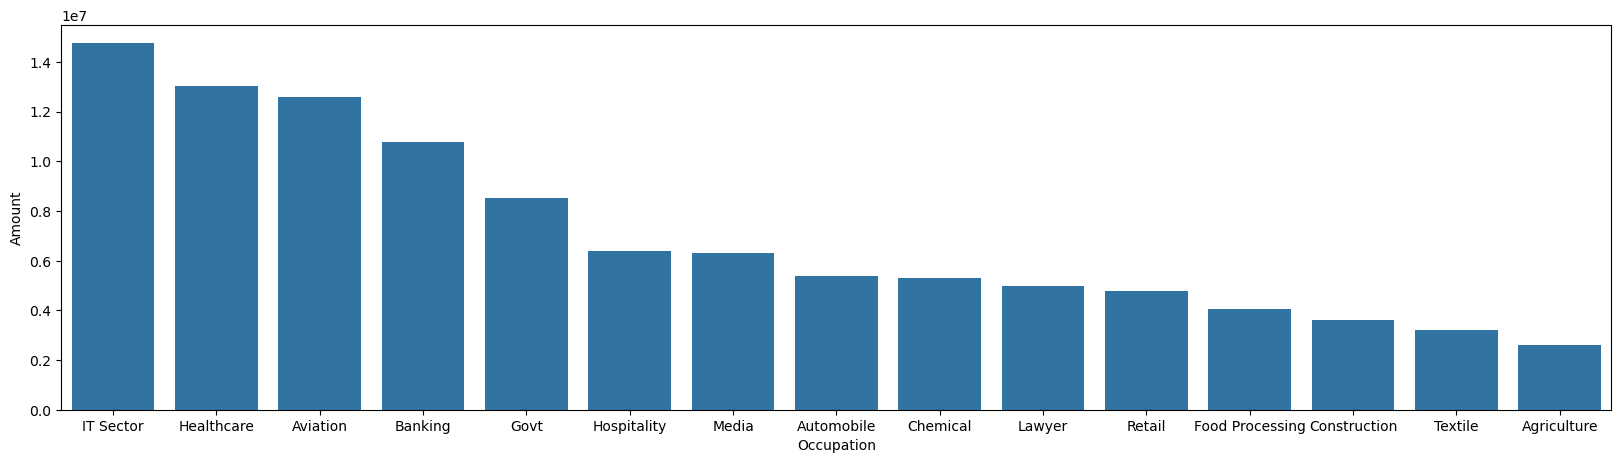

In [34]:
sales_occ = df.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)

plt.figure(figsize = (20,5))
sns.barplot(x = 'Occupation' , y = 'Amount' , data = sales_occ)

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

In [35]:
sales_occ.head()

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212


[Text(0, 0, '97'),
 Text(0, 0, '26'),
 Text(0, 0, '112'),
 Text(0, 0, '72'),
 Text(0, 0, '1059'),
 Text(0, 0, '352'),
 Text(0, 0, '2490'),
 Text(0, 0, '386'),
 Text(0, 0, '356'),
 Text(0, 0, '103'),
 Text(0, 0, '2087'),
 Text(0, 0, '96'),
 Text(0, 0, '2655'),
 Text(0, 0, '422'),
 Text(0, 0, '520'),
 Text(0, 0, '212'),
 Text(0, 0, '81'),
 Text(0, 0, '113')]

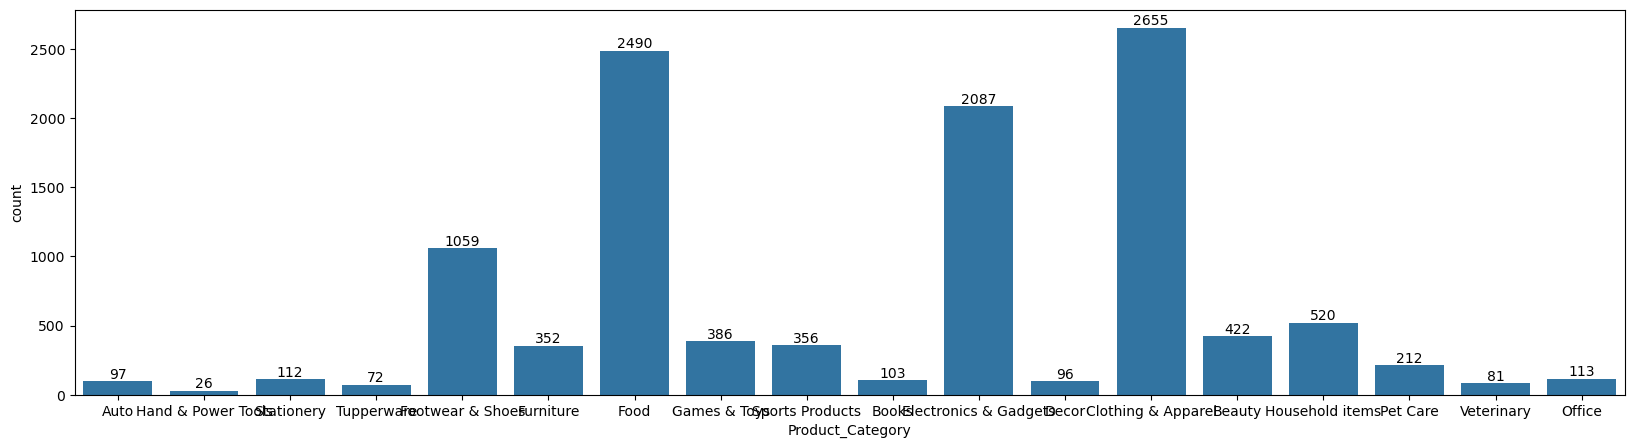

In [36]:
plt.figure(figsize = (20,5))

ax = sns.countplot(x = 'Product_Category' , data = df)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Product_Category', ylabel='Amount'>

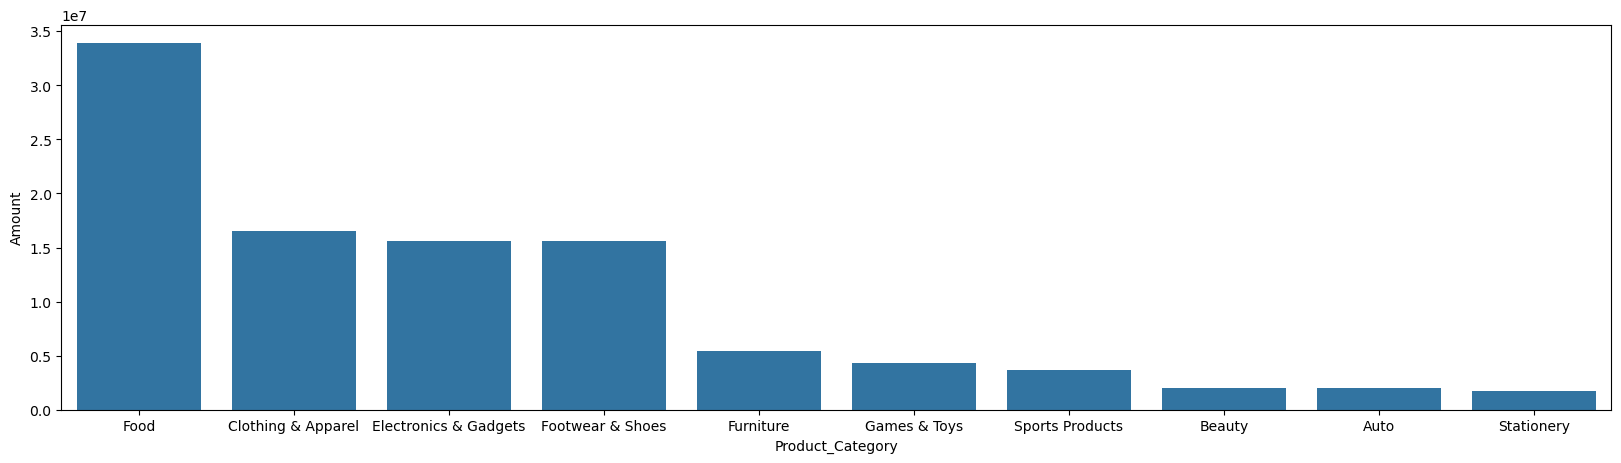

In [37]:
sales_cat = df.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(10)

plt.figure(figsize = (20,5))
sns.barplot(x = 'Product_Category' , y = 'Amount' , data = sales_cat)

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

In [38]:
sales_cat.head()

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051


<Axes: xlabel='Product_ID', ylabel='Orders'>

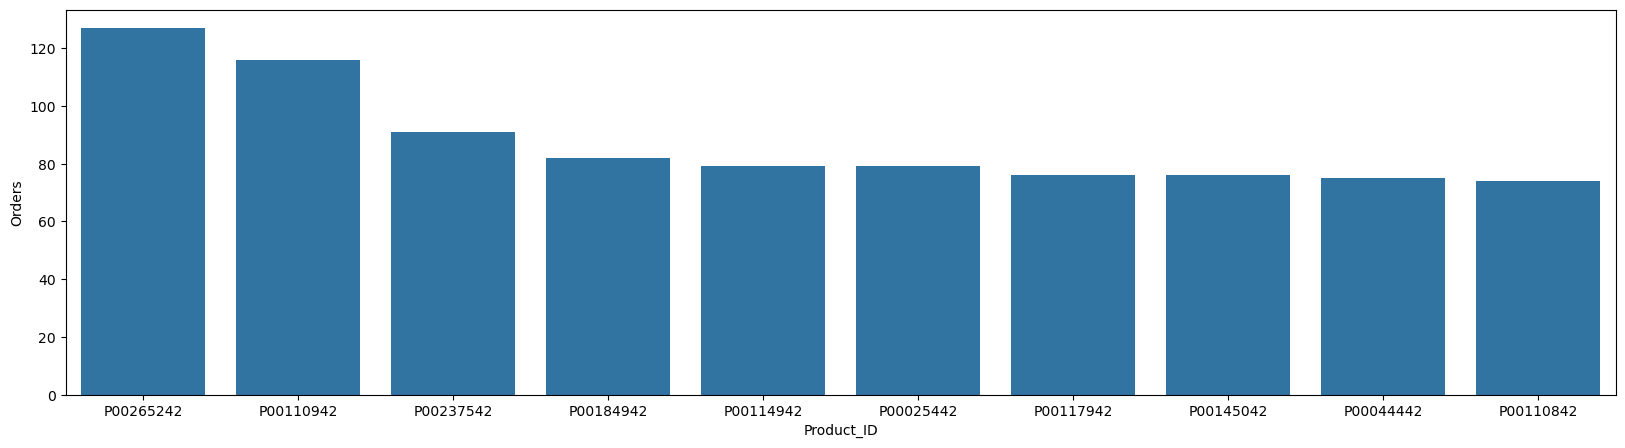

In [39]:
sales_prd = df.groupby(['Product_ID'],as_index = False)['Orders'].sum().sort_values(by = 'Orders',ascending = False).head(10)

plt.figure(figsize = (20,5))
sns.barplot(x = 'Product_ID', y = 'Orders', data = sales_prd)

In [40]:
sales_prd

,Product_ID,Orders
1679,P00265242,127
644,P00110942,116
1504,P00237542,91
1146,P00184942,82
679,P00114942,79
171,P00025442,79
708,P00117942,76
888,P00145042,76
298,P00044442,75
643,P00110842,74


## Conclusion:

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*

Thank you!